In [17]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [20]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 37s 1s/step - loss: 0.7399 - accuracy: 0.5224 - val_loss: 0.6920 - val_accuracy: 0.4924
Epoch 2/20
33/33 [==============================] - 36s 1s/step - loss: 0.6601 - accuracy: 0.6141 - val_loss: 0.6273 - val_accuracy: 0.6298
Epoch 3/20
33/33 [==============================] - 35s 1s/step - loss: 0.6127 - accuracy: 0.6762 - val_loss: 0.5222 - val_accuracy: 0.7405
Epoch 4/20
33/33 [==============================] - 36s 1s/step - loss: 0.4440 - accuracy: 0.7832 - val_loss: 0.4366 - val_accuracy: 0.8092
Epoch 5/20
33/33 [==============================] - 36s 1s/step - loss: 0.3371 - accuracy: 0.8586 - val_loss: 0.3823 - val_accuracy: 0.8282
Epoch 6/20
33/33 [==============================] - 37s 1s/step - loss: 0.2733 - accuracy: 0.8883 - val_loss: 0.3438 - val_accuracy: 0.8626
Epoch 7/20
33/33 [==============================] - 37s 1s/step - loss: 0.1892 - accuracy: 0.9265 - val_loss: 0.2716 - val_accuracy: 0.8893
Epoch 8/20
33/33 [==

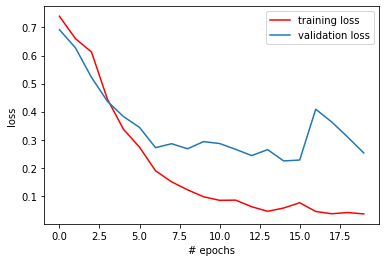

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

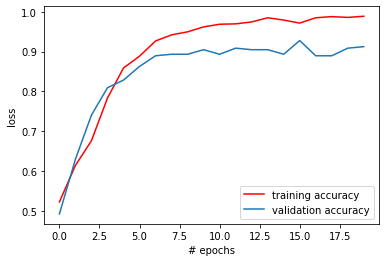

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 200ms/step - loss: 0.2636 - accuracy: 0.9384
[0.26356828212738037, 0.9383561611175537]
